In [1]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as st
from pprint import pprint
import os

In [2]:
#example url: https://comtrade.un.org/api/refs/da/view?type=C&freq=M&ps=201607&px=HS.
#b_url='http://comtrade.un.org/api/get?max=10000&type=C&freq=M&px=H4&ps=202001&r=842&p=124&rg=02&cc=AG6&fmt=json'
       
data_path= "TMEC trade Ag.csv"

trade_data = pd.read_csv(data_path)
trade_df=pd.DataFrame(trade_data)

In [3]:
tmec=trade_df.drop(['Unnamed: 65', 'Unnamed: 66'],axis=1)

In [4]:
imp_df=tmec.loc[tmec['Trade flow']=='Imports',:].reset_index()
exp_df=tmec.loc[tmec['Trade flow']=='Exports',:].reset_index(drop=True)
exp_df

,Indicator,Trade flow,Commodity,Partner,Reporter,2016-01,2016-02,2016-03,2016-04,2016-05,...,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
0,Value (US$),Exports,TOTAL Total of all HS commodities,Canada,Mexico,"673,513,620.00","855,808,067.00","1,030,015,330.00","835,010,153.00","901,328,049.00",...,"1,109,045,534.00","421,954,600.00","374,476,087.00","869,043,591.00","904,055,805.00","1,090,931,071.00","989,978,120.00","1,126,677,049.00",NaN,NaN
1,Value (US$),Exports,TOTAL Total of all HS commodities,Canada,USA,"19,795,340,021.00","20,798,135,479.00","23,126,750,115.00","23,379,246,350.00","22,923,021,254.00",...,"23,522,242,488.00","14,768,997,561.00","14,809,489,186.00","20,096,422,899.00","21,076,439,049.00","22,816,331,283.00","23,288,055,490.00","23,574,920,507.00","22,570,607,916.00",NaN
2,Value (US$),Exports,TOTAL Total of all HS commodities,Mexico,Canada,"349,304,305.00","418,771,385.00","489,216,411.00","485,333,756.00","496,797,466.00",...,"418,679,078.00","243,021,094.00","234,352,818.00","353,621,473.00","366,787,563.00","365,463,812.00","446,175,634.00","443,339,880.00","500,151,076.00",NaN
3,Value (US$),Exports,TOTAL Total of all HS commodities,Mexico,USA,"18,065,821,662.00","18,226,266,428.00","19,338,779,373.00","19,385,064,326.00","19,040,586,277.00",...,"20,048,068,514.00","12,527,542,645.00","10,440,323,370.00","15,787,255,885.00","18,448,794,043.00","17,047,019,040.00","18,703,114,281.00","20,508,218,453.00","19,301,947,369.00",NaN
4,Value (US$),Exports,TOTAL Total of all HS commodities,USA,Canada,"23,867,690,954.00","23,262,422,440.00","24,806,144,831.00","23,631,278,637.00","24,550,666,441.00",...,"26,277,476,981.00","16,081,005,262.00","16,663,364,333.00","21,681,509,649.00","23,586,497,746.00","25,179,536,853.00","26,051,749,625.00","26,483,382,128.00","25,306,858,682.00",NaN
5,Value (US$),Exports,TOTAL Total of all HS commodities,USA,Mexico,"19,920,134,070.00","23,901,500,481.00","25,790,492,773.00","25,003,684,997.00","25,622,192,628.00",...,"30,435,295,097.00","18,421,814,835.00","13,883,500,369.00","27,228,760,162.00","28,355,292,444.00","29,060,437,104.00","30,754,189,467.00","33,566,465,319.00",NaN,NaN
6,Value (US$),Exports,TOTAL Total of all HS commodities,World,Canada,"30,661,384,053.00","29,975,184,377.00","32,832,105,795.00","31,217,949,170.00","31,422,297,938.00",...,"34,447,662,185.00","23,380,379,134.00","24,301,246,434.00","30,235,321,537.00","31,830,670,694.00","32,724,917,593.00","34,949,204,247.00","35,747,407,550.00","35,580,426,870.00",NaN
7,Value (US$),Exports,TOTAL Total of all HS commodities,World,Mexico,"24,684,194,656.00","28,964,812,666.00","31,486,477,565.00","30,412,058,211.00","31,322,088,365.00",...,"38,342,697,819.00","23,383,299,067.00","18,068,348,857.00","33,076,474,130.00","35,655,846,025.00","36,979,024,492.00","38,546,606,327.00","41,944,511,089.00",NaN,NaN
8,Value (US$),Exports,TOTAL Total of all HS commodities,World,USA,"108,368,728,961.00","113,730,987,672.00","125,400,958,429.00","119,003,815,948.00","119,566,117,670.00",...,"134,400,749,545.00","95,683,779,400.00","90,584,959,523.00","104,967,248,780.00","112,581,599,137.00","117,958,253,650.00","121,378,736,772.00","132,402,660,776.00","126,854,420,188.00",NaN
9,Value (US$),Exports,02 Meat and edible meat offal,Canada,Mexico,"819,220.00","1,130,430.00","1,372,573.00","1,799,649.00","1,472,612.00",...,"4,137,029.00","3,486,411.00","7,898,825.00","5,991,751.00","3,814,487.00","5,080,620.00","6,149,888.00","4,724,832.00",NaN,NaN


In [5]:
e_can_mex_df=exp_df.loc[(exp_df['Reporter']=='Canada') & (exp_df['Partner']=='Mexico'),
                        :].reset_index(drop=True).transpose(copy=True)

e_can_mex_df.reset_index(inplace=True)
e_can_mex_df.drop([0,1,2,3,4],inplace=True)
e_can_mex_df.columns =['Period', 'Total of all HS commodities',
       '02 Meat and edible meat offal',
       '07 Vegetables and certain roots and tubers; edible',
       '08 Fruit and nuts, edible; peel of citrus fruit or melons',
       '22 Beverages, spirits and vinegar']


In [6]:
#remove commas "," from string values in order tho convert string values into numeric values
e_can_mex_df.replace(',','', regex=True, inplace=True)
e_can_mex_df.head(2)

,Period,Total of all HS commodities,02 Meat and edible meat offal,07 Vegetables and certain roots and tubers; edible,"08 Fruit and nuts, edible; peel of citrus fruit or melons","22 Beverages, spirits and vinegar"
5,2016-01,349304305.00,17621458.00,2338336.00,NaN,737764.00
6,2016-02,418771385.00,18133851.00,4686269.00,NaN,523975.00


In [7]:
#converting string values into numeric values
e_can_mex_df=e_can_mex_df.fillna(0)
e_can_mex_df['Total of all HS commodities']=e_can_mex_df['Total of all HS commodities'].astype(float)
e_can_mex_df['02 Meat and edible meat offal']=e_can_mex_df['02 Meat and edible meat offal'].astype(float)
e_can_mex_df['07 Vegetables and certain roots and tubers; edible']=e_can_mex_df['07 Vegetables and certain roots and tubers; edible'].astype(float)
e_can_mex_df['08 Fruit and nuts, edible; peel of citrus fruit or melons']=e_can_mex_df['08 Fruit and nuts, edible; peel of citrus fruit or melons'].astype(float)
e_can_mex_df['22 Beverages, spirits and vinegar']=e_can_mex_df['22 Beverages, spirits and vinegar'].astype(float)
e_can_mex_df.set_index('Period', drop=True)
e_can_mex_df.head(3)

,Period,Total of all HS commodities,02 Meat and edible meat offal,07 Vegetables and certain roots and tubers; edible,"08 Fruit and nuts, edible; peel of citrus fruit or melons","22 Beverages, spirits and vinegar"
5,2016-01,349304305.0,17621458.0,2338336.0,0.0,737764.0
6,2016-02,418771385.0,18133851.0,4686269.0,0.0,523975.0
7,2016-03,489216411.0,15811978.0,2916237.0,0.0,626398.0


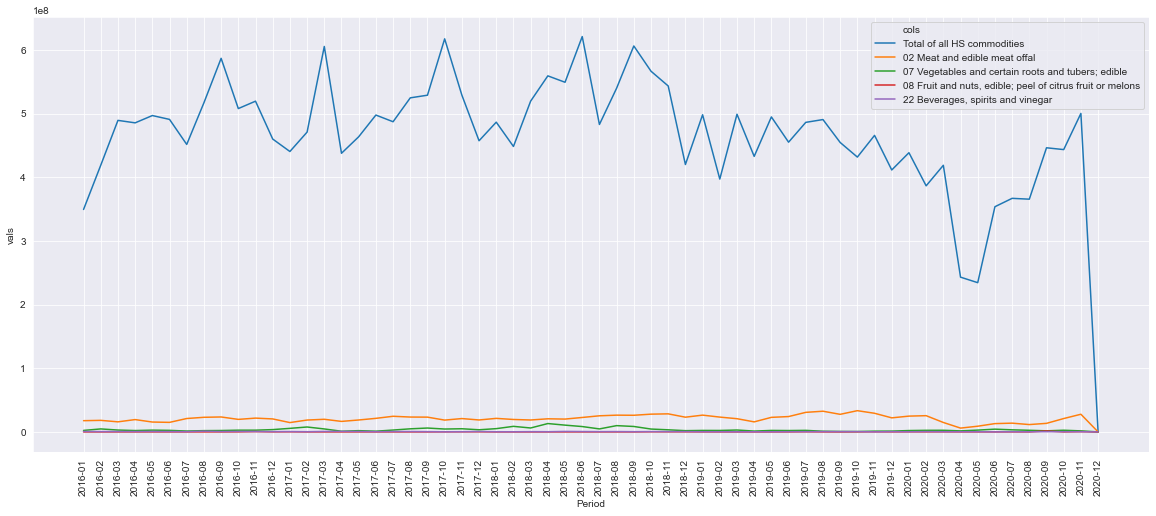

In [17]:

plot_df = e_can_mex_df.melt('Period', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
g = sns.lineplot(x="Period", y="vals", hue='cols', data=plot_df)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.xticks(rotation='vertical')

plt.show()


In [18]:
asd=e_can_mex_df.drop(['Total of all HS commodities'],axis=1)

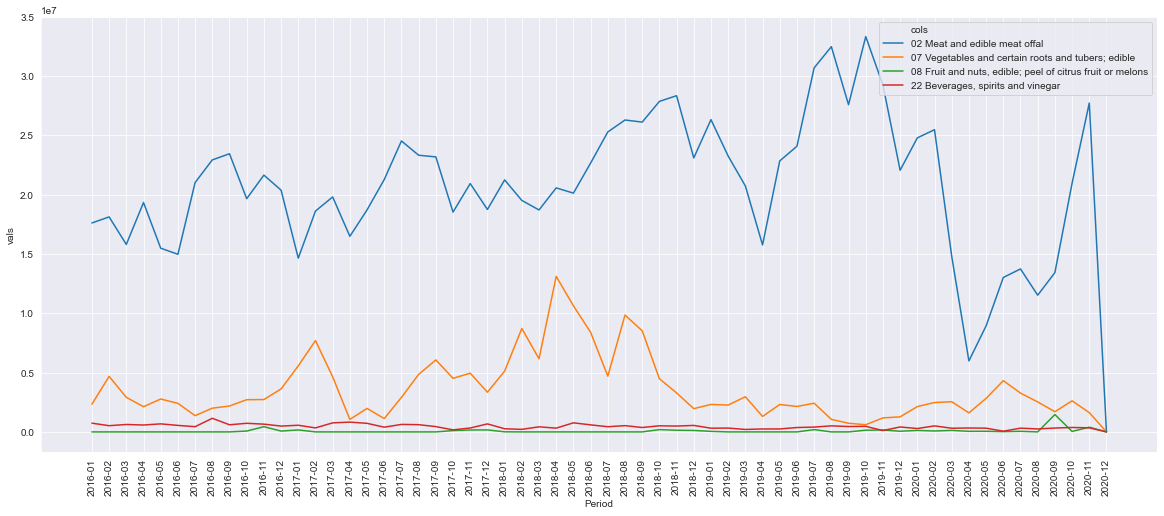

In [19]:
plot_df = asd.melt('Period', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
g = sns.lineplot(x="Period", y="vals", hue='cols', data=plot_df)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.xticks(rotation='vertical')

plt.show()